## Flight Price Prediction EDA and Feature Engineering
Data source - Kaggle

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 512.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Reading the test dataset in Excel format
df1 = pd.read_excel('../input/flight-price/Data_Train.xlsx')
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# Reading the test dataset in Excel format
df2 = pd.read_excel('../input/flight-price/Test_set.xlsx')
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
# Concatinating both as a single table.
df = pd.concat([df1,df2])
df.shape

(13354, 11)

In [6]:
#checking the data
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [7]:
# Checking its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [8]:
# Finding the null values in the dataset
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [9]:
#collecting index of null values
null_index = df[df['Route'].isnull()].index

In [10]:
# droping null values
df.drop(null_index,inplace=True)

In [11]:
#null values removed
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [12]:
# df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
# df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
# df['Year'] = df['Date_of_Journey'].str.split('/').str[2]


In [13]:
# df.head()

In [14]:
# Changing the data to correct data type date in date format.
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [15]:
# Checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13353 non-null  object        
 1   Date_of_Journey  13353 non-null  datetime64[ns]
 2   Source           13353 non-null  object        
 3   Destination      13353 non-null  object        
 4   Route            13353 non-null  object        
 5   Dep_Time         13353 non-null  object        
 6   Arrival_Time     13353 non-null  object        
 7   Duration         13353 non-null  object        
 8   Total_Stops      13353 non-null  object        
 9   Additional_Info  13353 non-null  object        
 10  Price            10682 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.2+ MB


In [16]:
# Creating 3 seprate column for year ,month and Day
df['Year'] = df['Date_of_Journey'].dt.year
df['Month'] = df['Date_of_Journey'].dt.month
df['Date'] = df['Date_of_Journey'].dt.day

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,2019,1,3


In [18]:
# Rechecking data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13353 non-null  object        
 1   Date_of_Journey  13353 non-null  datetime64[ns]
 2   Source           13353 non-null  object        
 3   Destination      13353 non-null  object        
 4   Route            13353 non-null  object        
 5   Dep_Time         13353 non-null  object        
 6   Arrival_Time     13353 non-null  object        
 7   Duration         13353 non-null  object        
 8   Total_Stops      13353 non-null  object        
 9   Additional_Info  13353 non-null  object        
 10  Price            10682 non-null  float64       
 11  Year             13353 non-null  int64         
 12  Month            13353 non-null  int64         
 13  Date             13353 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64

In [19]:
# Previous column is no more required so we drop that column to reduce redundency
df.drop('Date_of_Journey', axis=1, inplace=True)

In [20]:
# Extracting hour and minutes from arrival time
df['Arrival_Time'] = df['Arrival_Time'].str.split(" ").str[0]

In [21]:
# Creating 2 new column for arrival hour and minutes
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_hour'] = df['Arrival_hour'].astype(int)

In [22]:

df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]
df['Arrival_min'] = df['Arrival_min'].astype(int)

In [23]:
# Checking the new columns
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,2019,3,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,2019,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,2019,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,2019,1,3,21,35


In [24]:
# Droping the arrival_tim column as it is no more required.
df.drop('Arrival_Time', axis=1,inplace=True)

In [25]:
# Creating 2 new column for departure hour and minutes
df['dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['dep_min'] = df['Dep_Time'].str.split(':').str[1]
df['dep_hour'] = df['dep_hour'].astype(int)
df['dep_min'] = df['dep_min'].astype(int)

In [26]:
# Droping the departure time column.
df.drop('Dep_Time', axis=1,inplace=True)

In [27]:
# Finding the unique values from Total_stops column
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [28]:
# Transforming it into ordinal numerical data with respect to number of stops.
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_hour,Arrival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,2019,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,2019,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,2019,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,2019,1,3,21,35,16,50


In [30]:
# Creating a function which can convert total duration into number of minutes.
def duration_to_min(s):
    if 'm' not in s:
        s = s.split('h')
        duration = int(s[0])*60
        return duration
    s = s.replace('m',"")
    s = s.split('h')
    duration = (60*int(s[0])+int(s[1]))
    return duration

In [31]:
# Removing the faulty data
error_index = df[df['Duration'] == '5m'].index

In [32]:
# droping the rows with faulty data
df.drop(error_index, inplace=True)

In [33]:
# Appying the funtion created to duration column to crete a new column with duration in minutes
df['Duration_min'] = df['Duration'].apply(duration_to_min)

In [34]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,2019,3,24,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,2019,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,2019,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,2019,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,2019,1,3,21,35,16,50,285


In [35]:
# Now droping the old Duration column.
df.drop('Duration', axis=1, inplace=True)
df.drop('Route',axis=1 , inplace=True)

In [36]:
# Checking the data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Total_Stops      13350 non-null  int64  
 4   Additional_Info  13350 non-null  object 
 5   Price            10680 non-null  float64
 6   Year             13350 non-null  int64  
 7   Month            13350 non-null  int64  
 8   Date             13350 non-null  int64  
 9   Arrival_hour     13350 non-null  int64  
 10  Arrival_min      13350 non-null  int64  
 11  dep_hour         13350 non-null  int64  
 12  dep_min          13350 non-null  int64  
 13  Duration_min     13350 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.5+ MB


In [37]:
#finding the unique values in the data
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [38]:
airline_data = df.groupby(['Airline'],as_index=False)['Price'].sum()
airline_data

,Airline,Price
0,Air Asia,1783293.0
1,Air India,16814034.0
2,GoAir,1137045.0
3,IndiGo,11648071.0
4,Jet Airways,44804169.0
5,Jet Airways Business,350152.0
6,Multiple carriers,13039603.0
7,Multiple carriers Premium economy,148445.0
8,SpiceJet,3548717.0
9,Trujet,4140.0


<AxesSubplot:xlabel='Airline', ylabel='Price'>

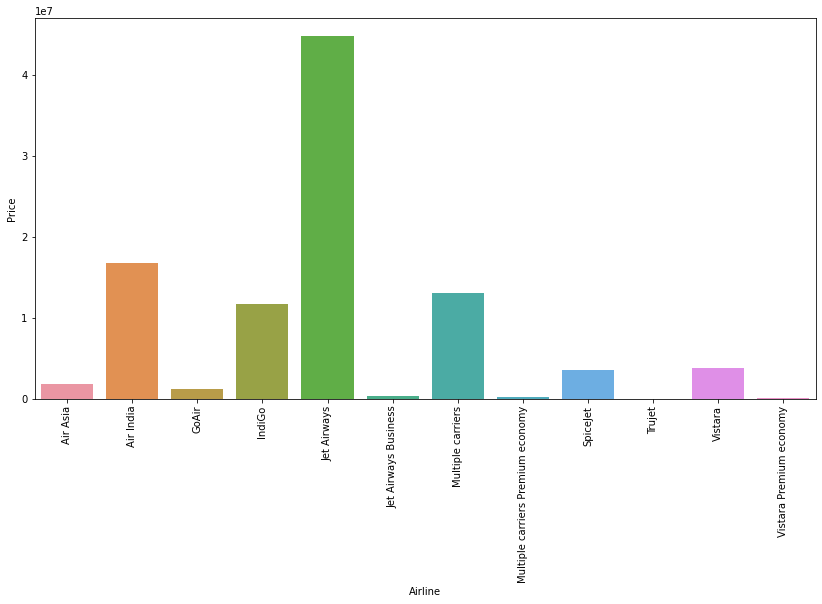

In [39]:
plt.figure(figsize=(14,7))
plt.xticks(rotation = 90)
sns.barplot(data=airline_data,x='Airline',y = 'Price')

### Observation
Jet Airways has heighest fare among all airlines with heighest std.

In [40]:
stops_data = df.groupby(['Total_Stops'],as_index= False)['Price'].mean()
stops_data

,Total_Stops,Price
0,0,5024.900315
1,1,10594.123556
2,2,12712.390646
3,3,13112.000000
4,4,17686.000000


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

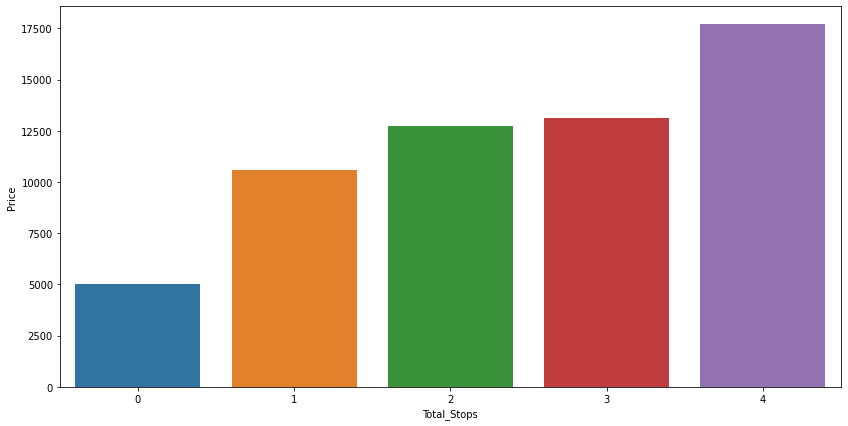

In [41]:
plt.figure(figsize=(14,7))
sns.barplot(data=stops_data,x='Total_Stops',y='Price')

### Observation
1. As in increase the number of stops average price of ticket increases .
2. non stop flight have least price .

In [42]:
Destination_data = df.groupby(['Destination'], as_index=False)['Price'].sum()
Destination_data

,Destination,Price
0,Banglore,26293736.0
1,Cochin,47796663.0
2,Delhi,6507057.0
3,Hyderabad,3509290.0
4,Kolkata,1824949.0
5,New Delhi,11107312.0


<AxesSubplot:xlabel='Destination', ylabel='Price'>

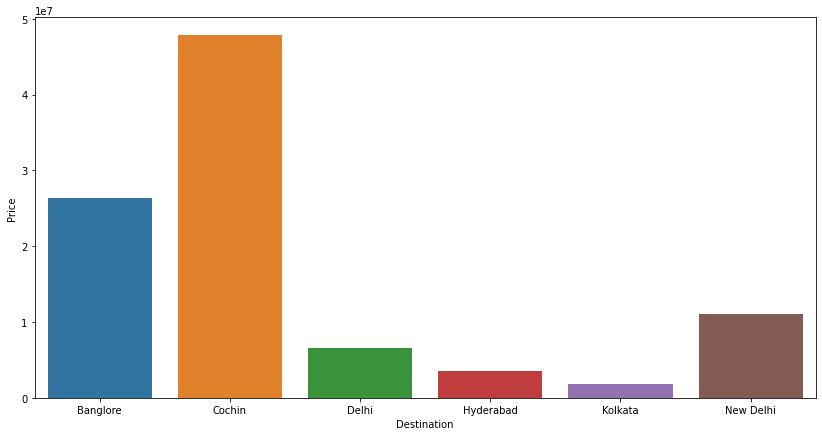

In [43]:
plt.figure(figsize=(14,7))
sns.barplot(data=Destination_data,x='Destination',y='Price')

## Observation
1. Cochin is the most costy destination from all.
2. Kolkata has least price from all destination.

In [44]:
# Creating all other object data into dummies.
pd.get_dummies(df,columns=['Airline','Source','Destination','Additional_Info'], drop_first=True)

,Total_Stops,Price,Year,Month,Date,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_min,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897.0,2019,3,24,1,10,22,20,170,...,1,0,0,0,0,0,0,0,1,0
1,2,7662.0,2019,1,5,13,15,5,50,445,...,0,0,0,0,0,0,0,0,1,0
2,2,13882.0,2019,9,6,4,25,9,25,1140,...,0,0,0,0,0,0,0,0,1,0
3,1,6218.0,2019,12,5,23,30,18,5,325,...,0,0,0,0,0,0,0,0,1,0
4,1,13302.0,2019,1,3,21,35,16,50,285,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,2019,6,6,20,25,20,30,1435,...,0,0,0,0,0,0,0,0,1,0
2667,0,NaN,2019,3,27,16,55,14,20,155,...,0,0,0,0,0,0,0,0,1,0
2668,1,NaN,2019,6,3,4,25,21,50,395,...,0,0,0,0,0,0,0,0,1,0
2669,1,NaN,2019,6,3,19,15,4,0,915,...,0,0,0,0,0,0,0,0,1,0
